In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "./data/heart_disease_manipulated.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Selecting the required features
selected_features = [
    "Blood Pressure",
    "Cholesterol Level",
    "BMI",
    "Stress Level",
    "Sleep Hours",
    "Sugar Consumption",
    "Triglyceride Level",
    "Fasting Blood Sugar",
    "CRP Level",
    "Homocysteine Level"
]
target_column = "Heart Disease Status"

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in selected_features + [target_column]:
    if df[col].dtype == 'object':  # If column is categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting dataset into features and target variable
X = df[selected_features]
y = df[target_column]

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizing data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for batch processing
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_size = X_train.shape[1]
model = HeartDiseaseModel(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), "heart_disease_model.pth")

print("Model training completed. Model saved as 'heart_disease_model.pth'.")


In [ ]:
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary labels
    accuracy = (y_pred == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
def plot_heart_disease_heatmap(x_feature, y_feature):
    """
    Plots a heatmap showing counts of only heart disease patients in each category combination.
    
    Parameters:
    - x_feature: Feature for x-axis
    - y_feature: Feature for y-axis
    """
    plt.figure(figsize=(8, 6))

    # Filter dataset to only include patients with heart disease (Heart Disease Status = 1)
    heart_disease_df = df[df["Heart Disease Status"] == 1]

    # Create a cross-tabulation (pivot table) for heart disease patients only
    heatmap_data = pd.crosstab(heart_disease_df[x_feature], heart_disease_df[y_feature])

    # Plot heatmap
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"Heatmap of {x_feature} vs {y_feature} (Only Heart Disease Patients)")
    plt.show()

# Example usage
plot_heart_disease_heatmap("Sleep Hours", "Gender")


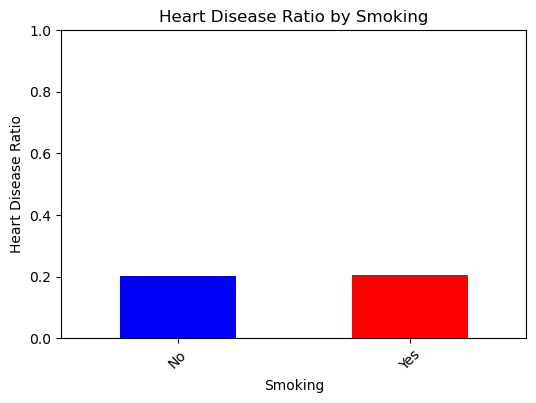

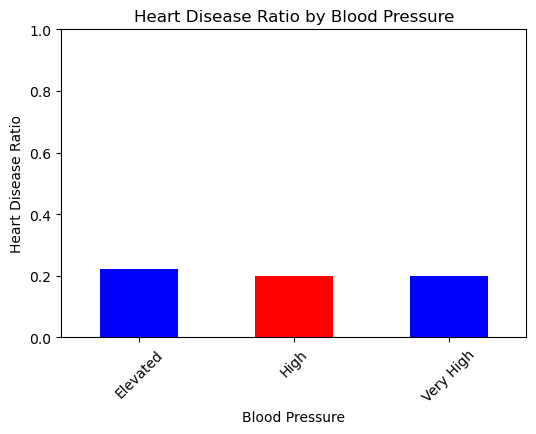

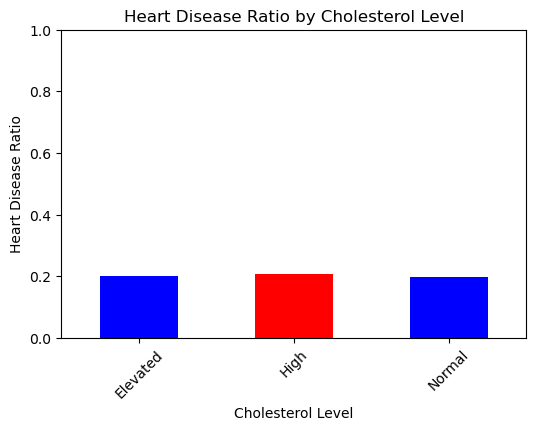

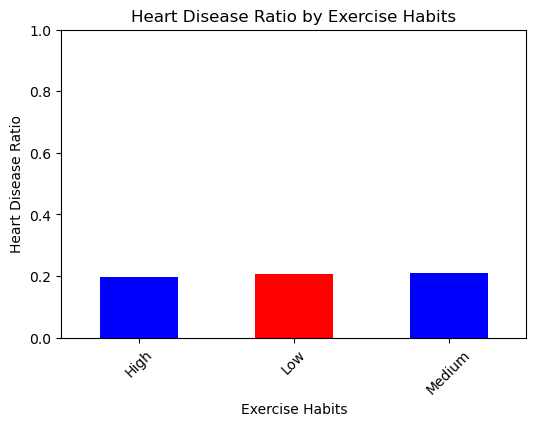

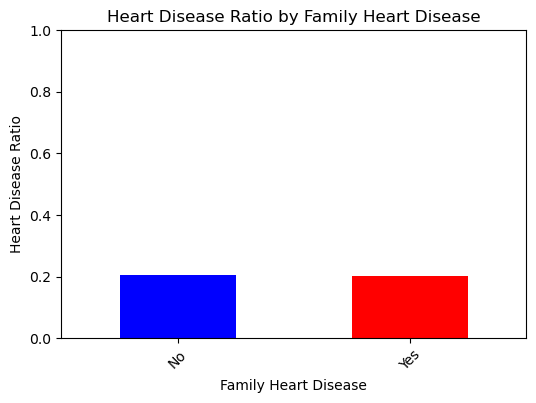

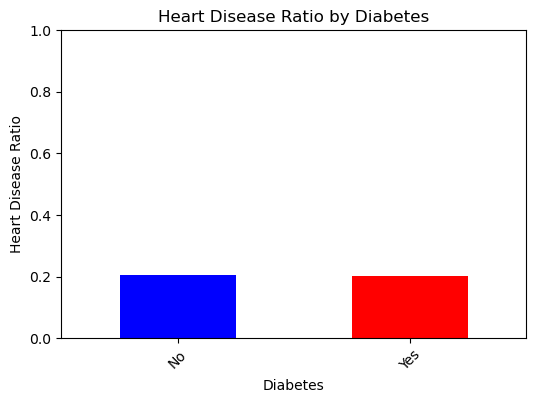

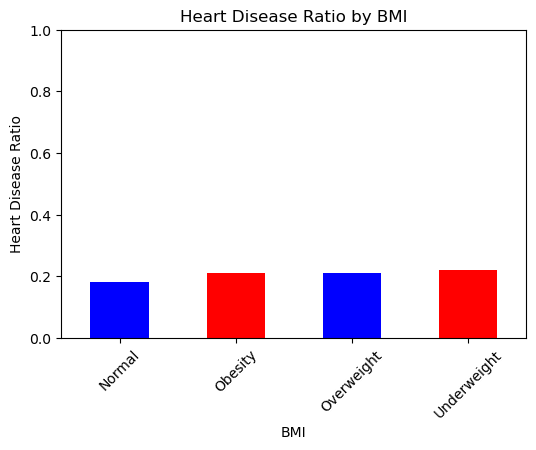

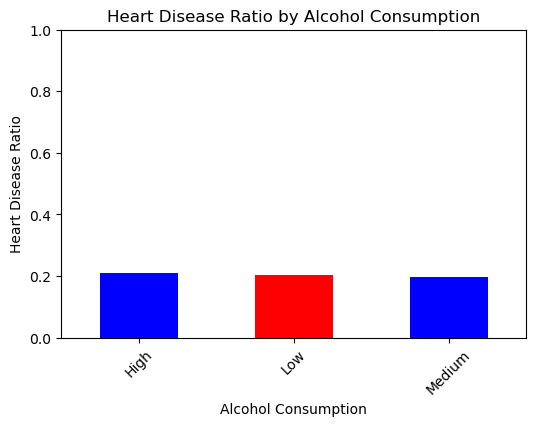

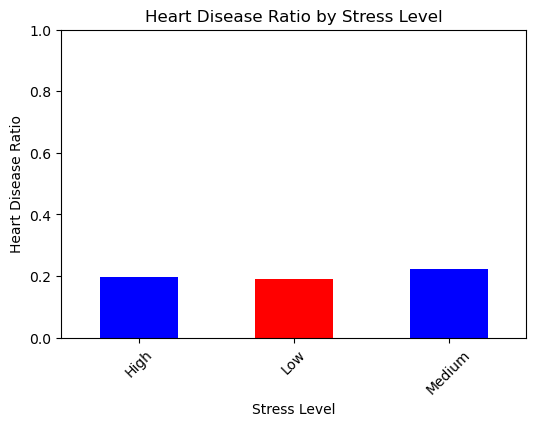

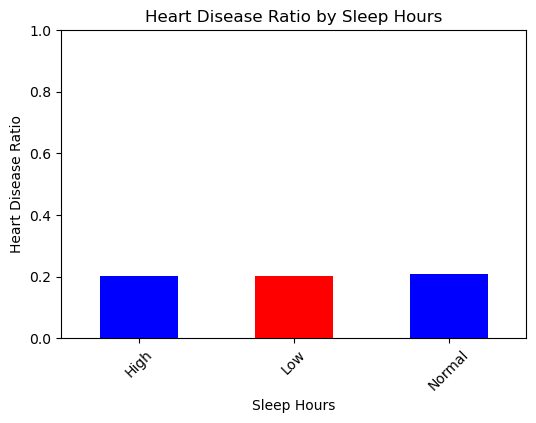

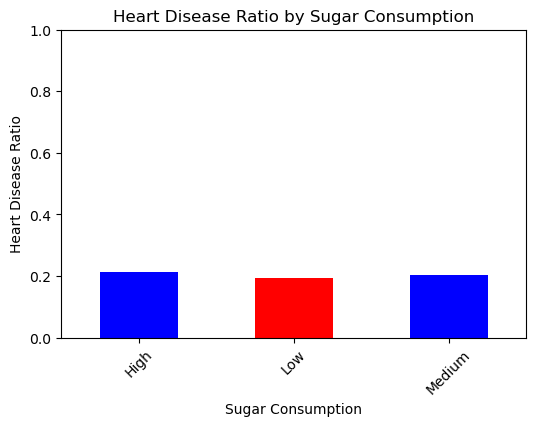

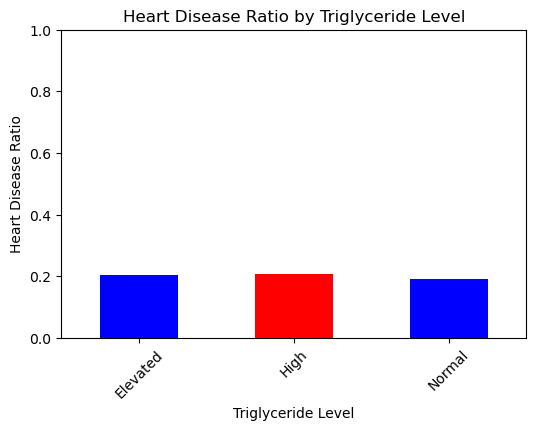

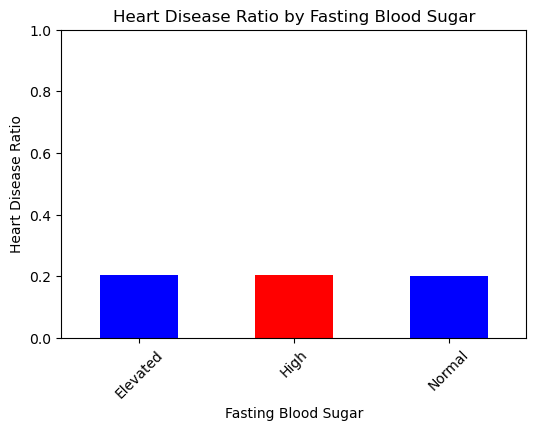

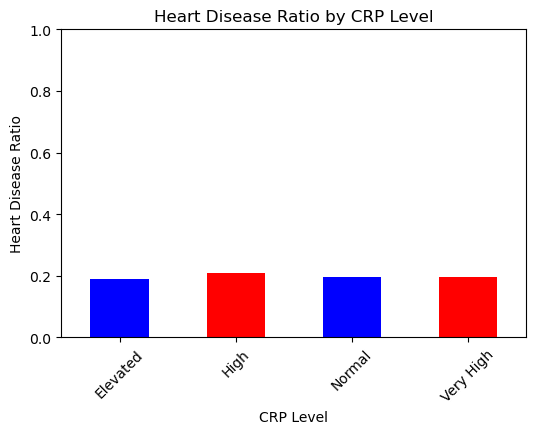

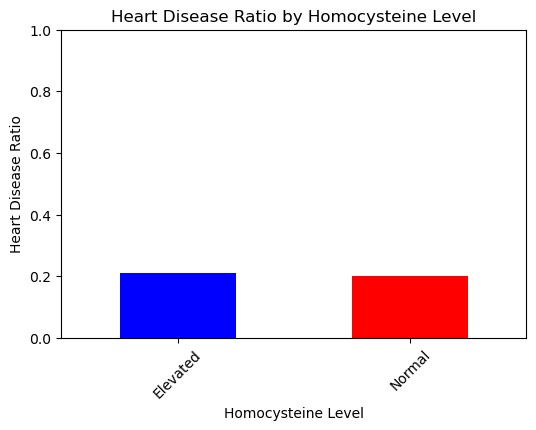

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/heart_disease_manipulated.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'Heart Disease Status' into binary values (if not already)
df['Heart Disease Status'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

# List of categorical features to analyze
categorical_features = [
    "Smoking",
    "Blood Pressure",
    "Cholesterol Level",
    "Exercise Habits",
    "Family Heart Disease",
    "Diabetes",
    "BMI",
    "Alcohol Consumption",
    "Stress Level",
    "Sleep Hours",
    "Sugar Consumption",
    "Triglyceride Level",
    "Fasting Blood Sugar",
    "CRP Level",
    "Homocysteine Level"
]

# Function to plot bar graphs for categorical features
def plot_feature_impact(feature):
    grouped = df.groupby(feature)["Heart Disease Status"].mean()  # Compute heart disease ratio

    plt.figure(figsize=(6, 4))
    grouped.plot(kind='bar', color=['blue', 'red'])
    plt.xlabel(feature)
    plt.ylabel("Heart Disease Ratio")
    plt.title(f"Heart Disease Ratio by {feature}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Since it's a ratio, the max value should be 1
    plt.show()

# Generate plots for each categorical feature
for feature in categorical_features:
    plot_feature_impact(feature)
